개별 주식의 베타(Beta)

In [ ]:
#개별 주식의 베타(Beta)**는 해당 주식이 시장 전체 수익률에 대해 얼마나 민감하게 반응하는지를 나타내는 지표

## 1. 삼성전자 사례

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\pykrx\__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


📌 삼성전자의 베타: 1.1744


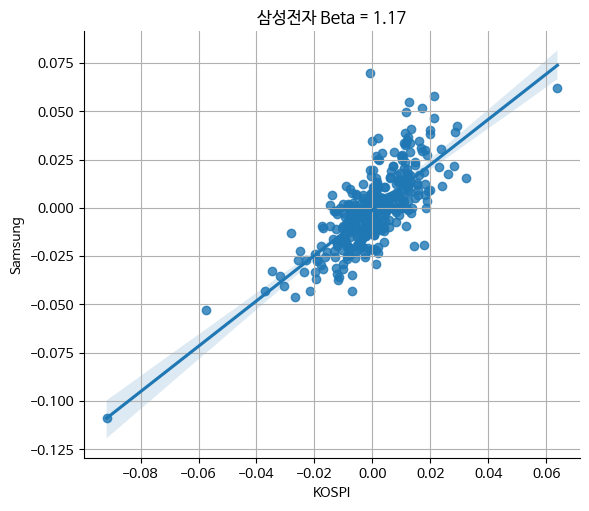

In [2]:
# 설치 필요 (최초 1회만)
# pip install pykrx pandas numpy matplotlib seaborn

from pykrx import stock
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 1. 날짜 설정
start_date = "2024-01-01"
end_date = datetime.today().strftime("%Y-%m-%d")

# 2. 삼성전자 및 KOSPI 지수 종가 데이터 수집
samsung = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")['종가']
kospi = stock.get_index_ohlcv_by_date(start_date, end_date, "1001")['종가']  # 1001 = KOSPI

# 3. 로그 수익률 계산
returns = pd.DataFrame({
    'Samsung': np.log(samsung / samsung.shift(1)),
    'KOSPI': np.log(kospi / kospi.shift(1))
}).dropna()

# 4. 공분산 기반 베타 계산
cov_matrix = returns.cov()
beta = cov_matrix.loc['Samsung', 'KOSPI'] / cov_matrix.loc['KOSPI', 'KOSPI']
print(f"📌 삼성전자의 베타: {beta:.4f}")

# 5. 회귀 기반 시각화 (베타 시각적 확인)
sns.lmplot(x='KOSPI', y='Samsung', data=returns, height=5, aspect=1.2)
plt.title(f"삼성전자 Beta = {beta:.2f}")
plt.grid(True)
plt.show()


## 2. 최근 52주(약 1년)의 주간 데이터

In [ ]:
# 베타 계산 기준을 최근 1년(52주) 주간 수익률로 설정
# 시장 지수(KOSPI) 를 기준으로 삼성전자의 시장 민감도 측정

📌 최근 52주 삼성전자 베타 (주간 수익률 기준): 1.2189


C:\Users\JYB\AppData\Local\Temp\ipykernel_5100\1171634640.py:45: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  plt.tight_layout()
C:\Users\JYB\AppData\Local\Temp\ipykernel_5100\1171634640.py:45: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  plt.tight_layout()
C:\Users\JYB\AppData\Local\Temp\ipykernel_5100\1171634640.py:45: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
C:\Users\JYB\AppData\Local\Temp\ipykernel_5100\1171634640.py:45: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from current font.
  plt.tight_layout()
C:\Users\JYB\AppData\Local\Temp\ipykernel_5100\1171634640.py:45: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  plt.tight_layout()
C:\Users\JYB\AppData\Local\Temp\ipykernel_5100\1171634640.py:45: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  plt.tight_layout()
C:\Users\JYB\AppDa

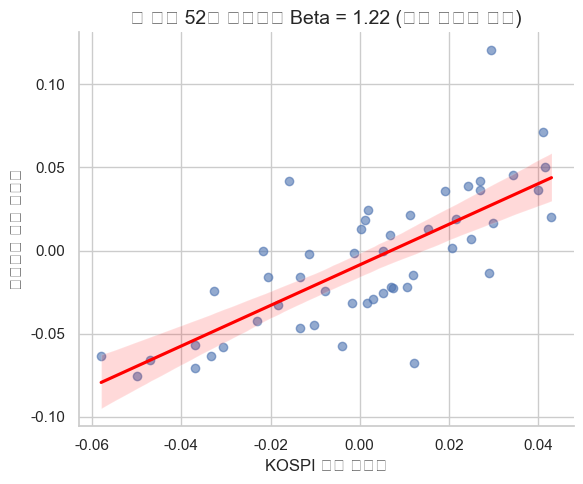

In [7]:
from pykrx import stock
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 날짜 범위 설정: 최근 52주
end_date = datetime.today()
start_date = end_date - timedelta(weeks=52)
start = start_date.strftime('%Y-%m-%d')
end = end_date.strftime('%Y-%m-%d')

# 2. 삼성전자 & KOSPI 지수 일별 데이터 수집
df_samsung = stock.get_market_ohlcv_by_date(start, end, "005930")
df_kospi = stock.get_index_ohlcv_by_date(start, end, "1001")  # KOSPI

# 3. 주간 종가 추출
samsung_weekly = df_samsung['종가'].resample('W').last()
kospi_weekly = df_kospi['종가'].resample('W').last()

# 4. 로그 수익률 계산
returns = pd.DataFrame({
    "Samsung": np.log(samsung_weekly / samsung_weekly.shift(1)),
    "KOSPI": np.log(kospi_weekly / kospi_weekly.shift(1))
}).dropna()

# 5. 베타 계산
cov_matrix = returns.cov()
beta = cov_matrix.loc["Samsung", "KOSPI"] / cov_matrix.loc["KOSPI", "KOSPI"]
print(f"📌 최근 52주 삼성전자 베타 (주간 수익률 기준): {beta:.4f}")

# 6. 회귀선 시각화
sns.set(style="whitegrid")
sns.lmplot(
    x="KOSPI", y="Samsung", data=returns,
    height=5, aspect=1.2,
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.6}
)
plt.title(f"📉 최근 52주 삼성전자 Beta = {beta:.2f} (주간 수익률 기준)", fontsize=14)
plt.xlabel("KOSPI 주간 수익률", fontsize=12)
plt.ylabel("삼성전자 주간 수익률", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


## 3. 포트폴리오 베타  

### 3-1 : 삼성전자 + SK하이닉스

In [8]:
import numpy as np

# 자산별 베타 (예: 직접 계산했거나 참고)
beta_samsung = 0.95
beta_hynix = 1.30

# 포트폴리오 내 자산 비중 (예: 삼성전자 60%, 하이닉스 40%)
weights = np.array([0.6, 0.4])
betas = np.array([beta_samsung, beta_hynix])

# 포트폴리오 베타 계산
portfolio_beta = np.dot(weights, betas)
print(f"📌 포트폴리오 베타: {portfolio_beta:.4f}")


📌 포트폴리오 베타: 1.0900


In [ ]:
# 포트폴리오 베타: 1.0900
# → 시장이 1% 상승하면, 이 포트폴리오는 약 1.09% 상승하는 경향이 있음을 의미합니다.

### 3-2[PYKRX 기반] 삼성전자 + SK하이닉스 포트폴리오 베타 계산

In [9]:
from pykrx import stock
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 최근 52주 기간 설정
end_date = datetime.today()
start_date = end_date - timedelta(weeks=52)
start = start_date.strftime('%Y-%m-%d')
end = end_date.strftime('%Y-%m-%d')

# 2. 일별 종가 수집 → 주간 종가로 리샘플링
def get_weekly_log_return(code, is_index=False):
    if is_index:
        df = stock.get_index_ohlcv_by_date(start, end, code)
    else:
        df = stock.get_market_ohlcv_by_date(start, end, code)
    weekly = df['종가'].resample('W').last()
    return np.log(weekly / weekly.shift(1)).dropna()

# 개별 주식 수익률
ret_samsung = get_weekly_log_return("005930")
ret_hynix = get_weekly_log_return("000660")

# 시장 수익률 (KOSPI)
ret_kospi = get_weekly_log_return("1001", is_index=True)

# 3. 베타 계산 함수
def calculate_beta(stock_ret, market_ret):
    aligned = pd.concat([stock_ret, market_ret], axis=1).dropna()
    aligned.columns = ['Stock', 'Market']
    cov_matrix = aligned.cov()
    beta = cov_matrix.loc['Stock', 'Market'] / cov_matrix.loc['Market', 'Market']
    return beta

beta_samsung = calculate_beta(ret_samsung, ret_kospi)
beta_hynix = calculate_beta(ret_hynix, ret_kospi)

print(f"📌 삼성전자 베타 (52주): {beta_samsung:.4f}")
print(f"📌 SK하이닉스 베타 (52주): {beta_hynix:.4f}")

# 4. 포트폴리오 베타 계산
weights = np.array([0.6, 0.4])  # 예: 삼성전자 60%, 하이닉스 40%
betas = np.array([beta_samsung, beta_hynix])
portfolio_beta = np.dot(weights, betas)

print(f"📊 포트폴리오 베타 (60% 삼성전자, 40% 하이닉스): {portfolio_beta:.4f}")


📌 삼성전자 베타 (52주): 1.2189
📌 SK하이닉스 베타 (52주): 2.1553
📊 포트폴리오 베타 (60% 삼성전자, 40% 하이닉스): 1.5935


## 4. CAPM 기대 수익률 

In [ ]:
#  CAPM 기반 기대 수익률 계산 예제
# # 입력: 무위험 수익률(Rf), 시장 기대 수익률(Rm), 종목별 베타

In [11]:
import pandas as pd

# 주어진 값
rf = 0.03  # 무위험 수익률
rm = 0.10  # 시장 기대 수익률

# 베타 (예시 값)
beta_samsung = 0.97
beta_hynix = 1.25

# CAPM 기대 수익률 계산
expected_return_samsung = rf + beta_samsung * (rm - rf)
expected_return_hynix = rf + beta_hynix * (rm - rf)

# 결과 표 형태로 출력
results = pd.DataFrame({
    '종목': ['삼성전자', 'SK하이닉스'],
    '베타': [beta_samsung, beta_hynix],
    '기대수익률 (CAPM)': [expected_return_samsung, expected_return_hynix]
})

# 결과 출력
print("\n📊 CAPM 기반 기대 수익률 (무위험 수익률 3%, 시장 수익률 10%)")
print(results.to_string(index=False, float_format="{:.2%}".format))



📊 CAPM 기반 기대 수익률 (무위험 수익률 3%, 시장 수익률 10%)
    종목      베타  기대수익률 (CAPM)
  삼성전자  97.00%         9.79%
SK하이닉스 125.00%        11.75%


## 5. 롤링 윈도우 기반 베타 추이 분석 (PYKRX + Matplotlib)

C:\Users\JYB\AppData\Local\Temp\ipykernel_5100\1418317717.py:51: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


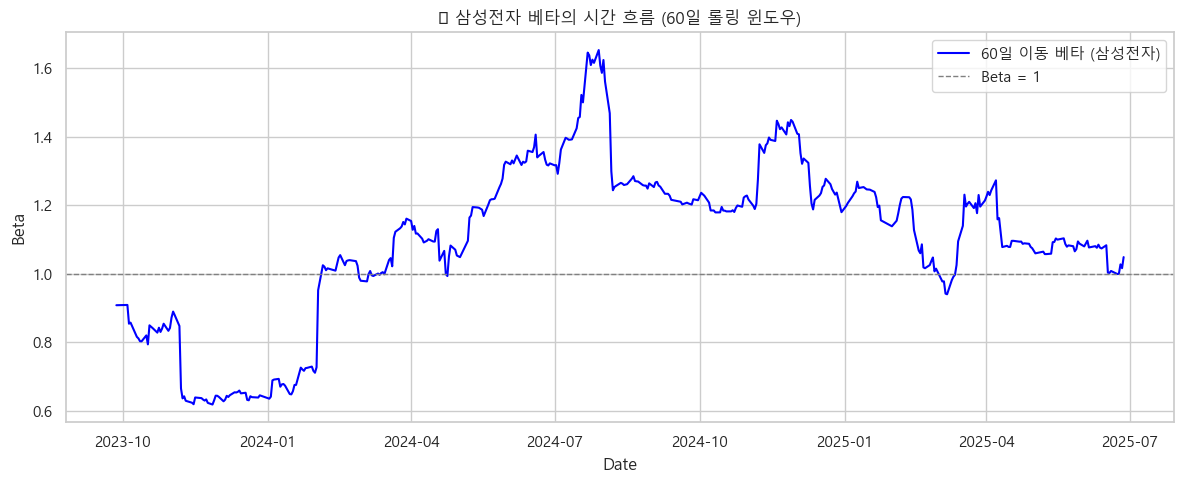

In [13]:
from pykrx import stock
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Windows에서 한글이 잘 보이는 기본 폰트 설정 (예: 'Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 깨짐 방지

# 1. 최근 2년간 일별 데이터 사용
end_date = datetime.today()
start_date = end_date - timedelta(weeks=104)
start = start_date.strftime('%Y-%m-%d')
end = end_date.strftime('%Y-%m-%d')

# 2. 종목과 KOSPI 데이터 수집
samsung = stock.get_market_ohlcv_by_date(start, end, "005930")['종가']
kospi = stock.get_index_ohlcv_by_date(start, end, "1001")['종가']

# 3. 로그 수익률 계산
returns = pd.DataFrame({
    'Samsung': np.log(samsung / samsung.shift(1)),
    'KOSPI': np.log(kospi / kospi.shift(1))
}).dropna()

# 4. 롤링 베타 계산 (60일 윈도우)
def calc_rolling_beta(returns, window=60):
    beta_series = []
    dates = []
    for i in range(window, len(returns)):
        window_data = returns.iloc[i-window:i]
        cov = window_data.cov().iloc[0, 1]
        var = window_data['KOSPI'].var()
        beta = cov / var
        beta_series.append(beta)
        dates.append(returns.index[i])
    return pd.Series(beta_series, index=dates)

rolling_beta = calc_rolling_beta(returns, window=60)

# 5. 시각화
plt.figure(figsize=(12, 5))
plt.plot(rolling_beta, label='60일 이동 베타 (삼성전자)', color='blue')
plt.axhline(1, color='gray', linestyle='--', linewidth=1, label='Beta = 1')
plt.title("📈 삼성전자 베타의 시간 흐름 (60일 롤링 윈도우)")
plt.xlabel("Date")
plt.ylabel("Beta")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
